# Exploratory Data Analysis

TASKS:
1. Describe the dataset (e.g., descriptive statistics, missing values, target rate).
    wymiary, ile jest brakujacych danych w poszczgolnych kolumnach, correlation heatmap, 
Describe the feature engineering procedure and the data treatments you followed (if any).
Describe the model selection process you applied (e.g., criteria for feature selection, estimation technique of the model parameters).
Explain the final model in terms of statistical results and business interpretation of regression coefficients.
Present the assumptions of the logistic regression and check if they are fulfilled by your model.
Calculate the following performance metrics: Accuracy, Precision, Recall and F1 score both in Testing and Training samples.
Create the ROC curve (AUC) and explain the discriminatory power of the model both in Testing and Training samples.

In [1]:
import pandas as pd
import sys
sys.path.append('C:\\Users\\mikol\\PycharmProjects\\Pre-selection Assignment\\Pre-selection-Assignment')
from source.utils import get_dataFrame_withShortCols
import seaborn as snus
import matplotlib.pyplot as plt

## Data Summary

In [4]:
train_data = get_dataFrame_withShortCols('development_sample.csv')
val_data = get_dataFrame_withShortCols('testing_sample.csv')

In [3]:
train_data.head()

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913


In [14]:
descriptions = get_descriptions('C:\\Users\\mikol\\PycharmProjects\\Pre-selection Assignment\\Pre-selection-Assignment\\descriptions.txt')

train_data.rename(columns=descriptions, inplace=True) 
val_data.rename(columns=descriptions, inplace=True)

In [16]:
train_data.head()

,ID,Customer ID,Application date,1. default 0. facility preforming,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration (months),...,Number of requests during the last 9 months (External data),Number of requests during the last 12 months (External data),Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months (indicator),Arrear in last 12 months (indicator),Credit bureau score (Exterval data),Average income (Exterval data),_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913


In [53]:
train_data.describe()

,ID,Customer ID,1. default 0. facility preforming,Number of applicants,Loan purpose,Application amount,Credit duration (months),Payment frequency,Installment amount,Value of the goods (car),...,Number of requests during the last 9 months (External data),Number of requests during the last 12 months (External data),Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months (indicator),Arrear in last 12 months (indicator),Credit bureau score (Exterval data),Average income (Exterval data),_r_
count,5.000000e+04,5.000000e+04,36718.000000,50000.00000,48597.000000,50000.000000,50000.000000,50000.00000,50000.000000,20827.000000,...,50000.000000,50000.000000,50000.000000,39912.000000,30117.000000,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04
mean,1.105998e+07,3.262894e+07,0.030693,1.33786,1.915098,17123.466000,42.141900,1.54724,1330.747722,35911.341048,...,1.355780,1.714940,7693.896000,13058.171210,24822.929304,0.012080,0.044480,6.78040,8182.152860,4.980869e-01
std,1.443390e+04,1.537429e+05,0.172488,0.66462,0.861268,12217.178461,45.378778,1.23719,1619.370201,18153.197904,...,1.591129,1.814075,20984.098355,13389.951429,26670.053145,0.109244,0.206161,10.83386,3190.983287,2.880834e-01
min,1.103498e+07,3.236142e+07,0.000000,1.00000,1.000000,700.000000,6.000000,1.00000,53.980000,4900.000000,...,0.000000,0.000000,0.000000,260.360000,0.000000,0.000000,0.000000,0.00000,3899.000000,3.953460e-07
25%,1.104748e+07,3.249680e+07,0.000000,1.00000,1.000000,6900.000000,15.000000,1.00000,470.112500,21400.000000,...,0.000000,0.000000,0.000000,4989.687500,5928.370000,0.000000,0.000000,0.00000,5035.000000,2.481838e-01
50%,1.105998e+07,3.263026e+07,0.000000,1.00000,2.000000,14100.000000,27.000000,1.00000,842.060000,31400.000000,...,1.000000,1.000000,0.000000,9020.885000,17291.290000,0.000000,0.000000,0.00000,8569.000000,4.966425e-01
75%,1.107248e+07,3.276254e+07,0.000000,1.00000,3.000000,24800.000000,48.000000,1.00000,1548.790000,47100.000000,...,2.000000,2.000000,0.000000,16279.495000,35005.380000,0.000000,0.000000,10.00000,11839.000000,7.468285e-01
max,1.108498e+07,3.289438e+07,1.000000,4.00000,3.000000,63700.000000,312.000000,6.00000,27075.540000,138300.000000,...,23.000000,26.000000,190800.000000,260497.970000,371035.800000,1.000000,1.000000,250.00000,12832.000000,9.999984e-01


In [54]:
val_data.describe()

,ID,Customer ID,1. default 0. facility preforming,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration (months),Payment frequency,Installment amount,...,Number of requests during the last 9 months (External data),Number of requests during the last 12 months (External data),Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months (indicator),Arrear in last 12 months (indicator),Credit bureau score (Exterval data),Average income (Exterval data),_r_
count,5.000000e+03,5.000000e+03,3647.000000,5000.000000,4861.000000,4861.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,3977.00000,3039.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,3.603748e+07,3.262122e+07,0.033178,1.353000,1.906398,1.651923,17431.500000,42.900000,1.537200,1348.536758,...,1.390200,1.796000,7835.04000,12949.02650,25254.007466,0.012000,0.04420,7.018000,8220.048400,0.487437
std,1.443520e+03,1.533360e+05,0.179126,0.682997,0.858078,0.735218,12091.838415,45.572928,1.219883,1708.141948,...,1.664121,1.939881,21864.09687,13665.54994,27723.058729,0.108896,0.20556,11.077555,3198.644416,0.287189
min,3.603498e+07,3.236171e+07,0.000000,1.000000,1.000000,1.000000,1000.000000,6.000000,1.000000,53.180000,...,0.000000,0.000000,0.00000,246.50000,0.000000,0.000000,0.00000,0.000000,3899.000000,0.000075
25%,3.603623e+07,3.248680e+07,0.000000,1.000000,1.000000,1.000000,7700.000000,18.000000,1.000000,469.360000,...,0.000000,0.000000,0.00000,4976.77000,5560.225000,0.000000,0.00000,0.000000,5035.000000,0.234235
50%,3.603748e+07,3.261770e+07,0.000000,1.000000,2.000000,1.000000,14500.000000,28.500000,1.000000,827.670000,...,1.000000,1.000000,0.00000,8863.87000,17218.450000,0.000000,0.00000,0.000000,8569.000000,0.483818
75%,3.603873e+07,3.275037e+07,0.000000,2.000000,3.000000,2.000000,24900.000000,51.000000,1.000000,1544.490000,...,2.000000,3.000000,0.00000,15840.28000,35113.895000,0.000000,0.00000,10.000000,11839.000000,0.734368
max,3.603998e+07,3.289419e+07,1.000000,4.000000,3.000000,3.000000,65400.000000,312.000000,6.000000,21723.240000,...,22.000000,22.000000,178800.00000,247650.17000,222423.530000,1.000000,1.00000,170.000000,12832.000000,0.999895


In [17]:
val_data.head()

,ID,Customer ID,Application date,1. default 0. facility preforming,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration (months),...,Number of requests during the last 9 months (External data),Number of requests during the last 12 months (External data),Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months (indicator),Arrear in last 12 months (indicator),Credit bureau score (Exterval data),Average income (Exterval data),_r_
0,36034977,32653719,03Feb2010 0:00:00,0.0,Approved,1,3.0,1.0,4800,15,...,8,8,0,4977.87,14880.28,0,0,70,3899,0.485674
1,36034978,32832365,04Feb2010 0:00:00,0.0,Approved,2,2.0,1.0,6800,18,...,1,1,29400,7922.90,6534.84,0,0,0,3899,0.267045
2,36034979,32544742,07Feb2010 0:00:00,0.0,Approved,1,3.0,1.0,4600,18,...,0,0,0,3174.15,16974.69,0,0,0,3899,0.793579
3,36034980,32395830,09Feb2010 0:00:00,NaN,Rejected,2,2.0,2.0,7900,48,...,2,2,0,4972.82,3484.36,0,0,10,3899,0.533040
4,36034981,32592943,13Feb2010 0:00:00,0.0,Approved,2,1.0,1.0,9900,63,...,3,3,0,2278.22,9630.53,0,0,10,3899,0.781269


In [26]:
f'Training data dimensions: {train_data.shape}'

'Training data dimensions: (50000, 36)'

In [27]:
f'Validation data dimensions: {val_data.shape}'

'Validation data dimensions: (5000, 36)'

## Null Values

In [58]:
null_counts = train_data.isnull().sum()
for column, count in null_counts.items():
    print(f'{column}: {count}')

ID: 0
Customer ID: 0
Application date: 0
1. default 0. facility preforming: 13282
Application_status: 0
Number of applicants: 0
Loan purpose: 1403
Distribution channel: 1403
Application amount: 0
Credit duration (months): 0
Payment frequency: 0
Installment amount: 0
Value of the goods (car): 29173
Application data: income of main applicant: 0
Application data: income of second applicant: 37538
Application data: profession of main applicant: 0
Application data: profession of second applicant: 37538
Application data: employment date (main applicant): 0
Application data: marital status of main applicant: 0
Application data: number of children of main applicant: 0
Application data: number of dependences of main applicant: 0
Spendings estimation: 40
Property ownership for property renovation: 37416
Clasification of the vehicle (Car, Motorbike): 29173
Number of requests during the last 3 months (External data): 0
Number of requests during the last 6 months (External data): 0
Number of reques

In [57]:
null_counts = val_data.isnull().sum()
for column, count in null_counts.items():
    print(f'{column}: {count}')

ID: 0
Customer ID: 0
Application date: 0
1. default 0. facility preforming: 1353
Application_status: 0
Number of applicants: 0
Loan purpose: 139
Distribution channel: 139
Application amount: 0
Credit duration (months): 0
Payment frequency: 0
Installment amount: 0
Value of the goods (car): 2905
Application data: income of main applicant: 0
Application data: income of second applicant: 3719
Application data: profession of main applicant: 0
Application data: profession of second applicant: 3719
Application data: employment date (main applicant): 0
Application data: marital status of main applicant: 0
Application data: number of children of main applicant: 0
Application data: number of dependences of main applicant: 0
Spendings estimation: 0
Property ownership for property renovation: 3721
Clasification of the vehicle (Car, Motorbike): 2905
Number of requests during the last 3 months (External data): 0
Number of requests during the last 6 months (External data): 0
Number of requests during

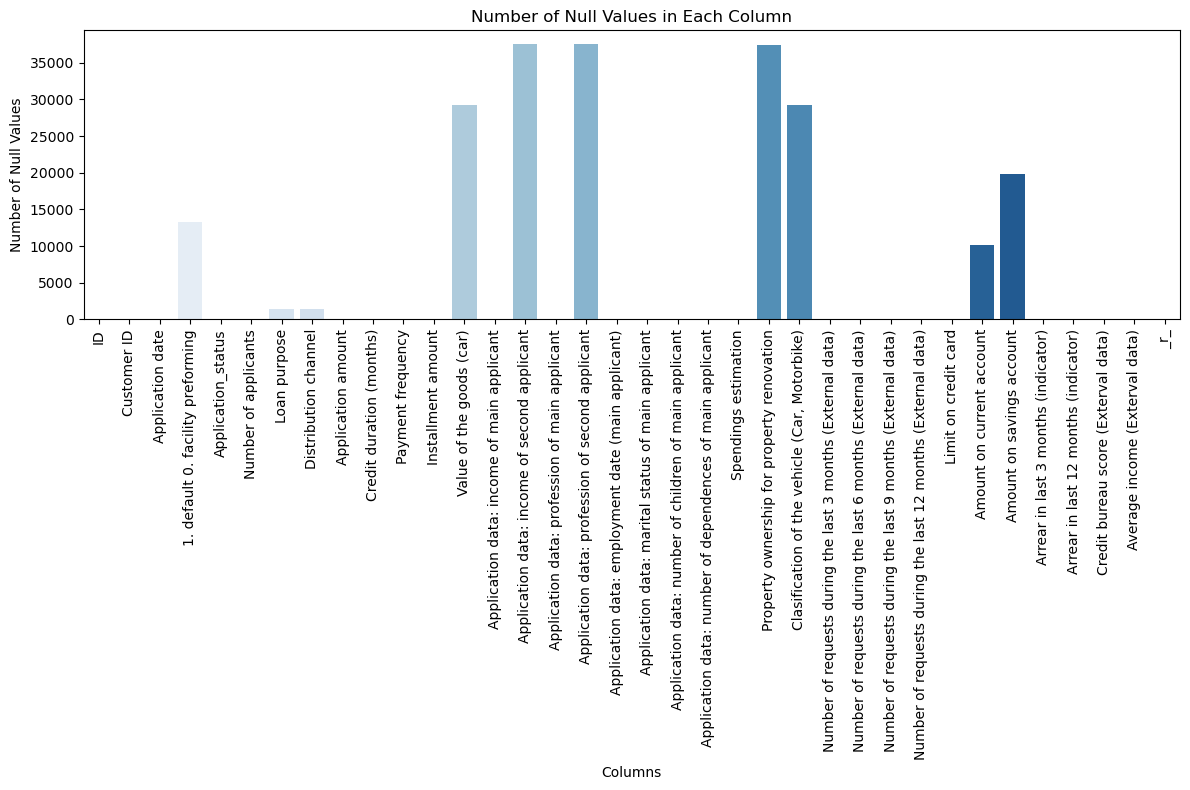

In [46]:
plt.figure(figsize=(12, 8))  
snus.barplot(x=train_data.isnull().sum().index, y=train_data.isnull().sum().values, palette='Blues')
plt.xticks(rotation=90)  
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column in Training Data')
plt.tight_layout()  
plt.show()

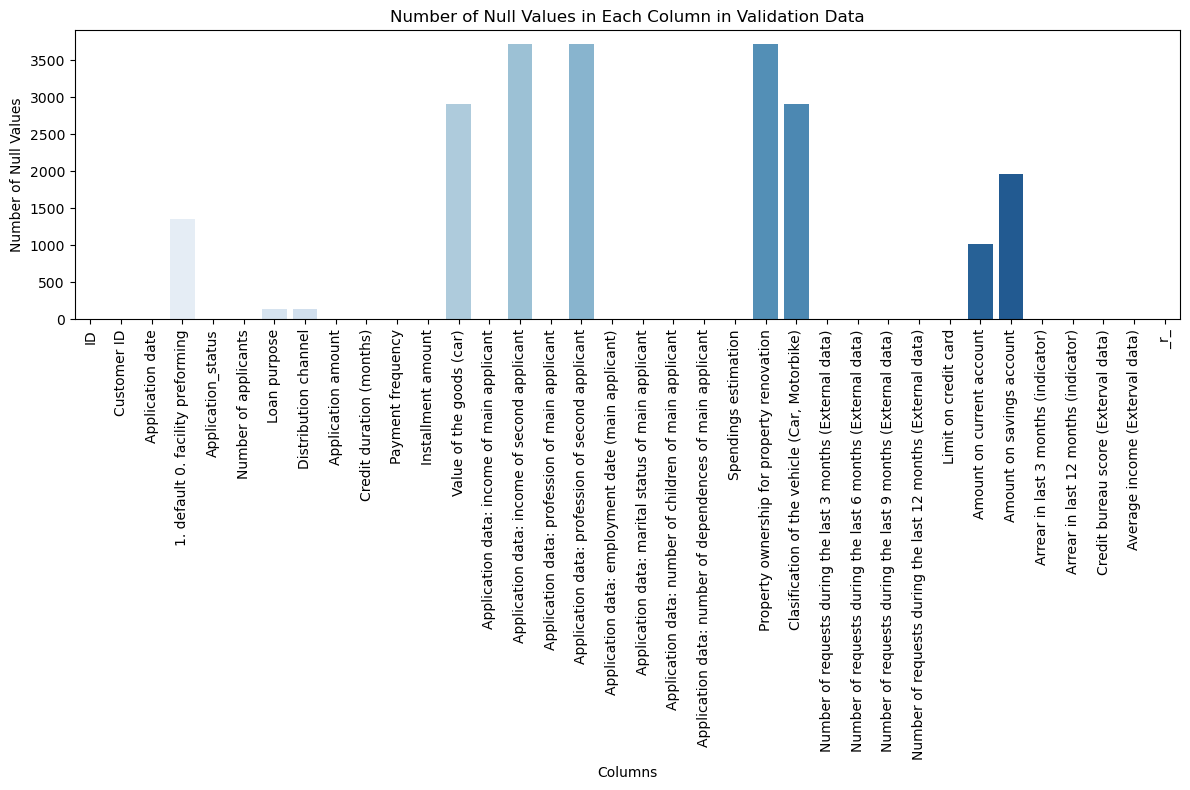

In [59]:
plt.figure(figsize=(12, 8))  
snus.barplot(x=train_data.isnull().sum().index, y=val_data.isnull().sum().values, palette='Blues')
plt.xticks(rotation=90)  
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Column in Validation Data')
plt.tight_layout()  
plt.show()